`scipy.stats`
=============

In [1]:
from scipy import stats
from numpy import linspace, hstack
from matplotlib.pyplot import plot, legend, hist, stem
%matplotlib inline

In [2]:
from scipy.stats import norm

In [3]:
# Sample from a Standard Normal Distribution
samp = norm.rvs(size=10)
print samp

[ 0.83303252 -0.91454633 -0.78198334  0.38092041 -1.14513311 -2.0417752
 -0.31983526 -1.56481427 -0.5340452  -0.47651109]


In [4]:
# Don't accidentally omit the keyword argument
samp = norm.rvs(10)
print samp

10.2200781509


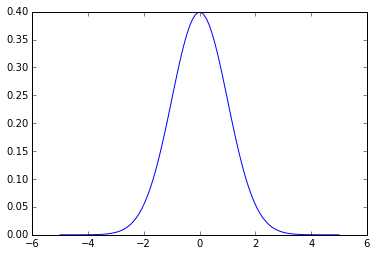

In [5]:
# Display distribution
x1 = linspace(-5, 5, 100)
pdf = norm.pdf(x1)
plot(x1, pdf)

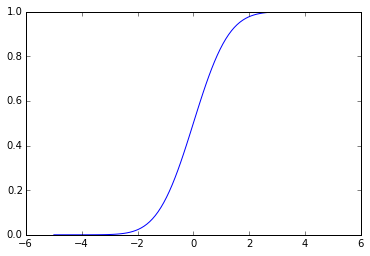

In [6]:
# Display Cumulative Distribution Function
# P(X < x)
cdf = norm.cdf(x1)
plot(x1, cdf)

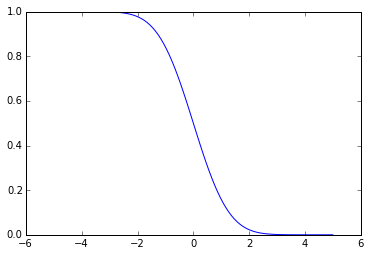

In [7]:
# Display Survivial Function (1 - CDF)
# P(X > x)
sf = norm.sf(x1)
plot(x1, sf)

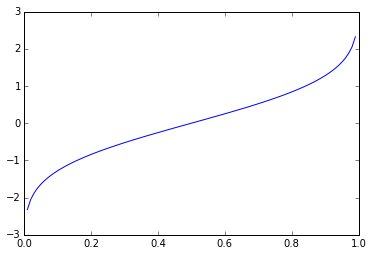

In [8]:
x2 = linspace(0, 1, 100)
# Display Percentage Point Function (quantile function)
# inverse of CDF
ppf = norm.ppf(x2)
plot(x2, ppf)

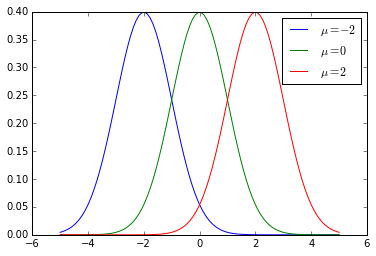

In [9]:
# Alter location parameter
d1 = norm.pdf(x1, loc=-2)
d2 = norm.pdf(x1, loc=0)
d3 = norm.pdf(x1, loc=2)
plot(x1, d1, label='$\mu=-2$')
plot(x1, d2, label='$\mu=0$')
plot(x1, d3, label='$\mu=2$')
legend()

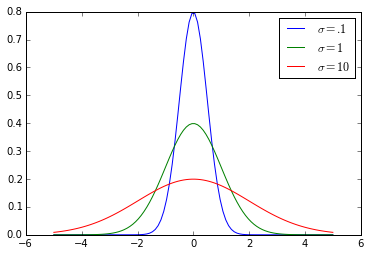

In [10]:
# Alter scale parameter
d4 = norm.pdf(x1, scale=.5)
d5 = norm.pdf(x1, scale=1)
d6 = norm.pdf(x1, scale=2)
plot(x1, d4, label='$\sigma=.1$')
plot(x1, d5, label='$\sigma=1$')
plot(x1, d6, label='$\sigma=10$')
legend()

In [11]:
# Fit to data
samp = norm.rvs(loc=10, scale=2, size=1000)
(loc_est, scale_est) = norm.fit(samp)
print loc_est, scale_est

9.96734833599 1.98784256343


In [12]:
# Create a loaded die
from scipy.stats import rv_discrete
xk = [1, 2, 3, 4, 5, 6]
pk = [0.3, 0.35, 0.25, 0.05, 0.025, 0.025]
new_dist = rv_discrete(name='loaded', values=(xk, pk))

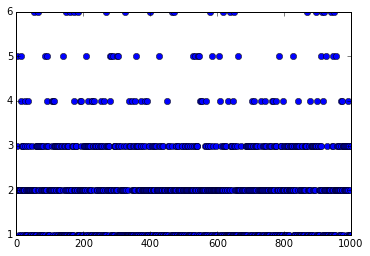

In [13]:
# Plot samples
plot(new_dist.rvs(size=1000), 'o')

(array([ 0.293,  0.382,  0.232,  0.05 ,  0.017,  0.026]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 6 Patch objects>)

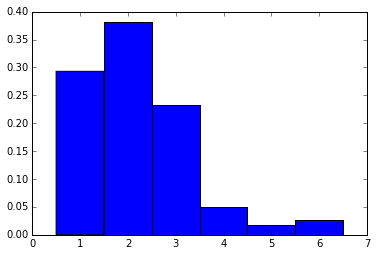

In [14]:
samples = new_dist.rvs(size=1000)
hist(samples, bins=6, range=(0.5, 6.5), normed=True)

<Container object of 3 artists>

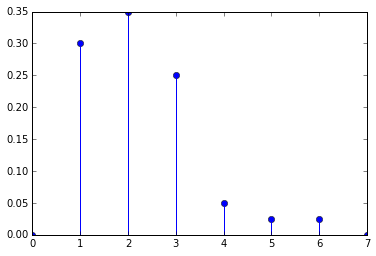

In [15]:
# Display PMF
x = range(0, 8)
stem(x, new_dist.pmf(x))

In [16]:
# Sample two normal distributions to simulate a bimodal
rv1 = norm.rvs(size=100)
rv2 = norm.rvs(loc=2.0, scale=0.8, size=100)
samples = hstack([rv1, rv2])

In [17]:
# Estimate PDF with Gaussian KDE
from scipy.stats.kde import gaussian_kde
approximate_pdf = gaussian_kde(samples)

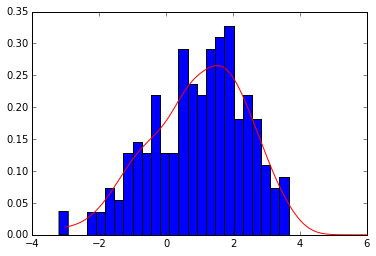

In [18]:
# Compare the kernel density estimate to histogram
hist(samples, bins=25, normed=True)
x = linspace(-3,6,200)
plot(x, approximate_pdf(x),'r')